## NLLS (Non-Linear Least Square)

- 对比经典的 OLS（Ordinary Least Square）应用在线性模型上，NNLS 对建模没有线性的要求；
- 两者目标函数的是相同的，即最小化 squared error

$$
\begin{split}
S&=\sum_{i=1}^mr_i^2\\
&=\sum_{i=1}^m\left(y_i-f(x_i,\beta)\right)^2
\end{split}
$$

- 在优化方法上，依然是梯度方法

$$
\frac{\partial S}{\partial \beta_j}=2\sum_i r_i\frac{\partial r_i}{\partial \beta_j}=0, \quad j=1,\cdots,n
$$

- Iterative optimization procedures for estimating parameters
    $$
    \beta_j\approx \beta_j^{k+1}=\beta_j^k+\Delta \beta_j
    $$
- User provided starting values
- Bad starting values may converge to local minima instead of global minima
- String sensitivity to outliers

```
def error(params, x, y):
    return np.sum((func(x, params) - y)**2)
```

## scipy api

- `scipy.optimize.leastsq(func, x0, args=(),`
    - Minimize the sum of squares of a set of equations.
    - 第一个参数 `func` 是 error function
    - A legacy wrapper for the MINPACK implementation of the Levenberg-Marquadt algorithm.
- `scipy.optimize.least_squares(fun, x0, ...)`
    - 第一个参数 `fun` 也是 error function
    - Solve a **nonlinear least-squares** problem with **bounds** on the variables.
    
    ```
    minimize F(x) = 0.5 * sum(rho(f_i(x)**2), i = 0, ..., m - 1)
    subject to lb <= x <= ub
    ```
    
- `scipy.optimize.curve_fit(f, xdata, ydata, ...)`
    - https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
    - Use **non-linear least squares** to fit a function, f, to data.
    - `ydata = f(xdata, *params) + eps.`
    - method{‘lm’, ‘trf’, ‘dogbox’}, optional
        - Default is ‘lm’ for unconstrained problems 
        - and ‘trf’ if bounds are provided. 
        - The method ‘lm’ won’t work when the number of observations is less than the number of variables, use ‘trf’ or ‘dogbox’ in this case.

- In some cases, writing an explicit function to compute the Jacobian is faster than letting leastsq estimate it numerically. Create a function to compute the Jacobian of the residuals and use it as an input for leastsq.

```
# curve_fit

if method == 'lm':
    ...
    res = leastsq(func, p0, Dfun=jac, full_output=1, **kwargs)
    ...
else:
   ...
    res = least_squares(func, p0, jac=jac, bounds=bounds, method=method,
                        **kwargs)
   ...
```

## 分段线性拟合

In [2]:

from scipy import optimize
import matplotlib.pyplot as plt
import numpy as np

x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10 ,11, 12, 13, 14, 15], dtype=float)
y = np.array([5, 7, 9, 11, 13, 15, 28.92, 42.81, 56.7, 70.59, 84.47, 90, 80, 70, 60])

def piecewise_linear(x, y0, y1, b0, b1, b2):
    x0 = 6
    x1 = 12
    return np.piecewise(x, 
                        [x < x0, 
                         (x >= x0) & (x < x1), 
                         x >= x1], 
                        [lambda x: b0*x + y0,          # (x0, b0x0+y0)
                         lambda x: b1*x + y1-b1*x1,    # (x0, b1(x0-x1)+y1), (x1, y1)
                         lambda x: b2*x + y1-b2*x1])   # (x1, y1)

In [3]:
p, e = optimize.curve_fit(piecewise_linear, x, y)

In [4]:
p

array([  3.        ,  93.74127658,   2.        ,  12.82392098,
       -11.60340422])

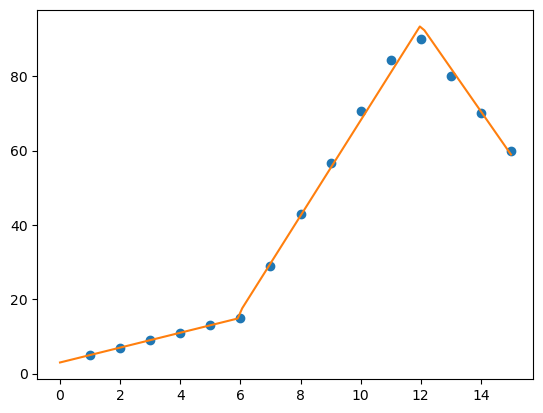

In [5]:
new_x = np.linspace(0, 15, 100)
plt.plot(x, y, "o")
plt.plot(new_x, piecewise_linear(new_x, *p))